### Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Exploration

In [221]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Here we have the following features :

- CustomerID: It is the unique ID given to a customer
- Gender: Gender of the customer
- Age: The age of the customer
- Annual Income(k$): It is the annual income of the customer
- Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Findings from descriptive statistics:

- The age of customers ranges from 18 to 70 and average customer age is ~38
- The Annual Income of customers ranges from 15k to 137k with an average Income of ~60k
- The Spending Score on the scale of 1 to 100 the average score is 50

### Correlation Analysis

In [12]:
df_copy = df.copy()
df_copy.drop('Gender', inplace=True, axis=1)

- As 'Gender' is not a numeric feature I am excluding it to find the correlation between the other numeric features.

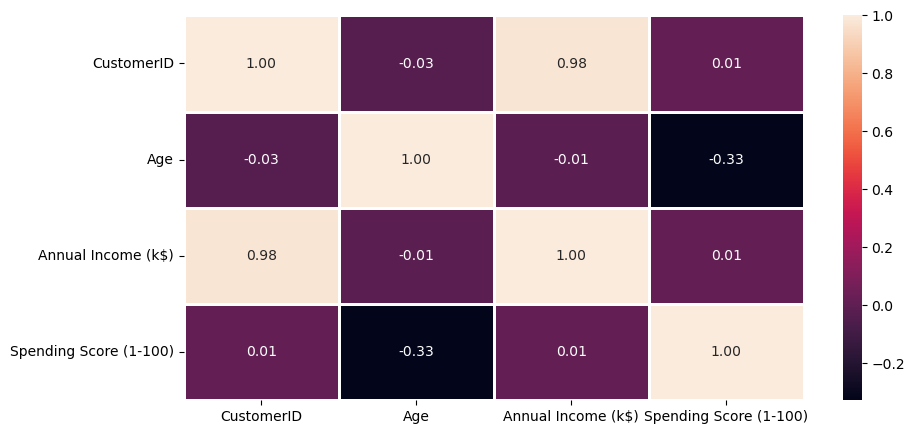

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

- This heatmap tells us the all features are correlated with each other either positively or Negatively.
- Which means there is no need to remove any features.

### Distribution of Data

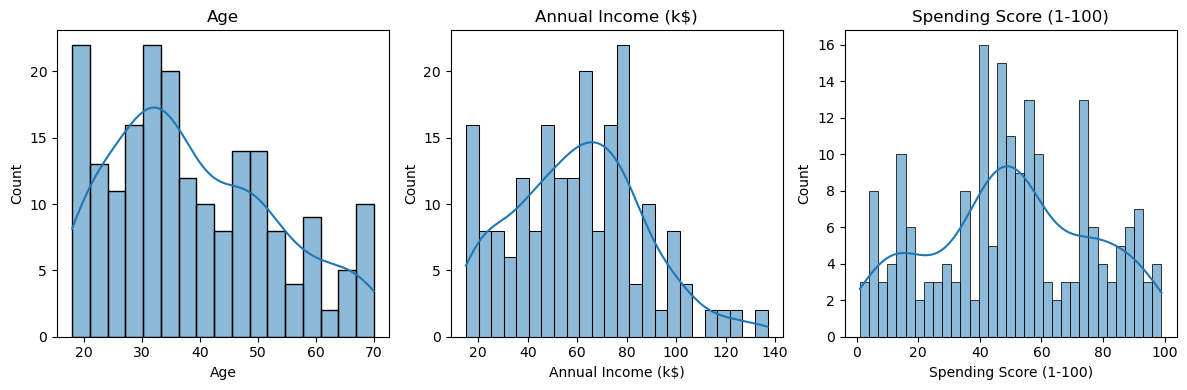

In [17]:
%matplotlib inline
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], binwidth=3, kde=True)
plt.title('Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], binwidth=5, kde=True)
plt.title('Annual Income (k$)')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'],binwidth=3, kde=True)
plt.title('Spending Score (1-100)')

plt.tight_layout()
plt.show()

Findings from this distribution plots
- Age: The age distribution is sightly right-skewed, with most customers being in the 30-40 age group with smaller peaks at 20-25 and 40-45. There are fewer customer in the older(60+) age groups.
- Annual Income (k$): The income distribution is roughly symmetric, with a it's highest around 50-80k. Lower-income groups are also more visible. Very high incomes (100k+) are less common.
- Spending Score (1-100): The spending score distribution is bimodal, with peaks around 40-60 and 70-80.
  - This suggests two distinct groups of customers :
     - moderate spenders and high spenders
     - fewer customers scoring below 30 or above 90 which means customers who spend extremely low or extremly high are less common.

### Exploratory Data Analysis

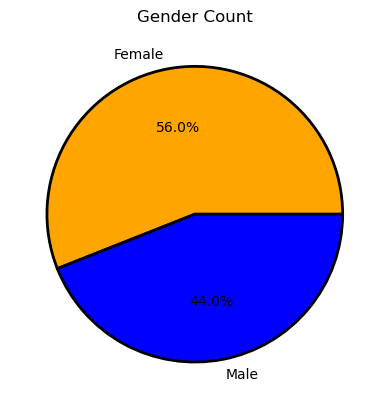

In [183]:
gender_count = df['Gender'].value_counts()

fig, ax = plt.subplots()
ax.pie(gender_count, labels=gender_count.index, colors=['orange', 'blue'], autopct='%1.1f%%',
      wedgeprops = {"edgecolor": "black", "linewidth": 2, "antialiased": True})
ax.set_title("Gender Count")
plt.show()

- In this chart we can see there are 12% more female customers than male customers

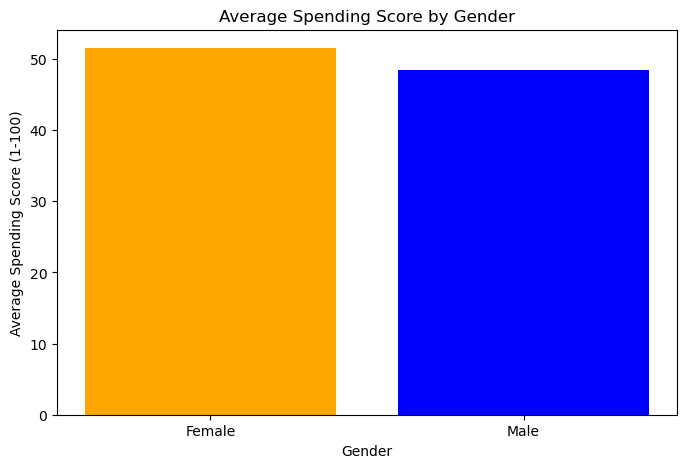

In [203]:
gender_spending = df.groupby('Gender')['Spending Score (1-100)'].mean()

plt.figure(figsize=(8, 5))
plt.bar(gender_spending.index, gender_spending.values, color=['orange', 'blue'])
plt.title('Average Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending Score (1-100)')
plt.show()

- This tells that both female and male customers averagely spend more at a similar rate. But compared to Male customers, Female customers spend 3% more.

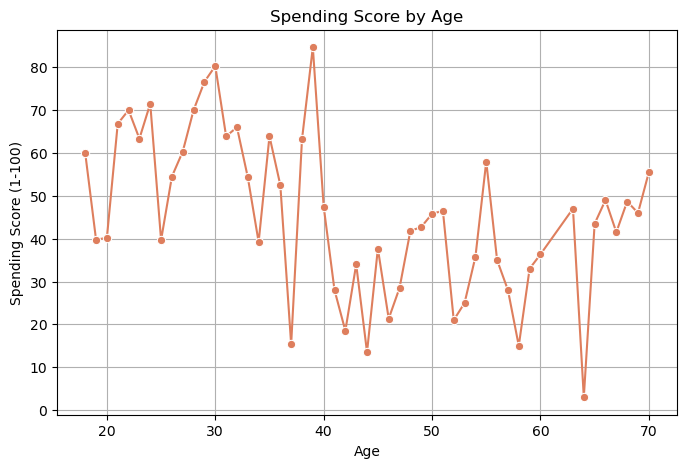

In [190]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Age', y='Spending Score (1-100)',color='#DE7E5D', marker='o', errorbar=None)
plt.title('Spending Score by Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

- The younger age group (20-40) varying widely, with scores ranging from 20 to 80 indicating younger individuals spend more.
- The middle age group (40-55) spending score dropped significantly, with score ranging from 20 to 50 indicating conservative spending of money at this stage of life.
- The older age group (55-70) shows a mixed pattern indicating variety of spending behaviours.
- Overall, spending score fluctuates significantly across different ages, with younger individuals tending to have higher scores on average.

## K-Means Clustering

K-means clustering is an unsupervised learning algorithm which is used to group or partition K clusters. It works by iteratively assigning each data point to it's nearst cluster centroid (mean of the points in the cluster) and then recalculating the centroids based on the newly assigned points.
The process continues until the assignments no longer change or a predefined number of iterations is reached.

In [175]:
from sklearn.cluster import KMeans

In [133]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

- There is a preprocessing method called Standardization. Which is used to standardize the features when one feature has much larger values than another, especially if they are on different scales.
- In this case, we don't have to standardize these features because they are on the same scale.

In [163]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

The elbow curve helps decide the best number of clusters for K-means. It shows how the total variation within clusters (WCSS) decreases as you increase the number of clusters, and the "elbow" point is where adding more clusters has minimal improvement.

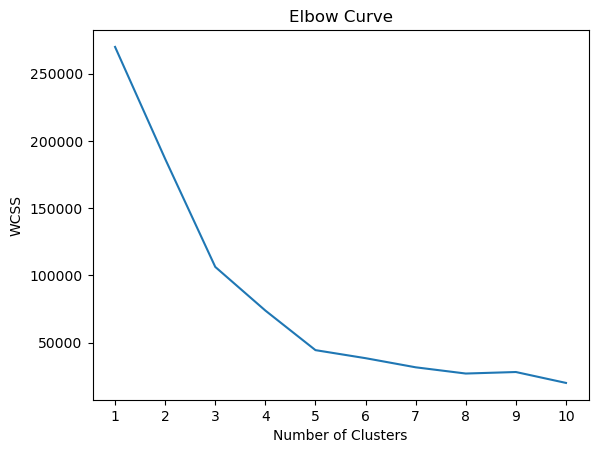

In [198]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

- In the figure we can see that the "elbow" of this curve is 5 because the curve is getting less steeper after 5. This means we should take 5 clusters for our segmentation.

In [167]:
kmeans=KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X)

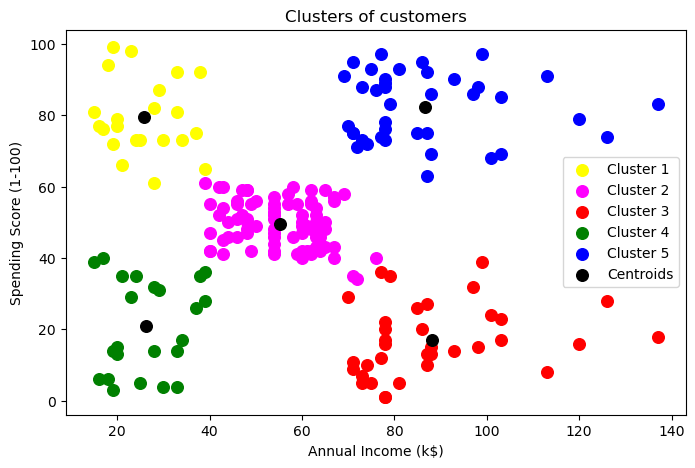

In [217]:
plt.figure(figsize=(8,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=70, c='yellow', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=70, c='magenta', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=70, c='red', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=70, c='green', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=70, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Findings from this Segmentation Results
- We can see that there are five groups of customers based on their income and spendings in the mall.
- In cluster 1 (yellow) customers with low income have high spending scores.
- In cluster 2 (magenta) customers with average income spend moderately.
- In cluster 3 (red) customers with high income spend very less.
- In cluster 4 (green) customers with low income spend less.
- In cluster 5 (blue) customers with high income spend more.

In conculsion, customers with low or high income spend extermely high or low but customers with moderate income spend moderatly.